# Task 1

In [18]:
#1
with open('senteces.txt') as file:
    text = file.read()
lines = text.split('\n')

In [19]:
def del_probel(elements):
    result = []
    for el in elements:
        if el != '':
            result.append(el)
    return result

In [20]:
#2
lines = del_probel([line.lower() for line in lines])

In [24]:
#3
import re
lines_word = [del_probel(re.split('[^a-z]', line)) for line in lines]

In [27]:
#4
words = {}
index = 0
for line in lines_word:
    for word in line:
        if word not in words:
            words[word] = index
            index += 1

In [32]:
#5
import numpy as np
matrix = np.zeros((22, 254))
for i, line in enumerate(lines_word):
    for word in line:
        j = words[word]
        matrix[i, j] += 1

In [33]:
matrix

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  1.]])

In [161]:
#6
from scipy.spatial.distance import cosine
first_line = matrix[0]
other_lines = matrix[1:]
distances = []
for other in other_lines:
    distances.append(float(cosine(first_line, other)))

In [162]:
lines[np.argmin(np.array(distances)) + 1]

'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).'

In [163]:
lines[6]

'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).'

In [167]:
distances = np.array(distances)
numbers = np.arange(1, 22, 1)[distances  < 0.8]

In [168]:
numbers

array([4, 6])

In [158]:
distances = [round(float(s), 5) for s in distances]

In [159]:
#7
with open('submission-1.txt', 'w') as file:
    file.write(' '.join(list(map(str, distances))))
#8 Yes! No! 

In [160]:
!cat submission-1.txt

0.77709 0.73274

# Task 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from math import *

In [2]:
def f(x):
    return sin(x / 5)*exp(x / 10) + 5*exp(-x / 2)

def f_np(x):
    return np.sin(x / 5)*np.exp(x / 10) + 5*np.exp(-x / 2)

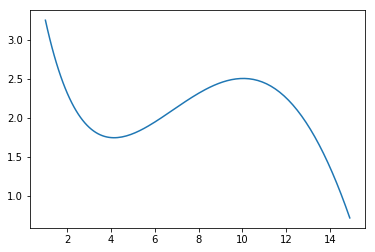

In [3]:
x = np.arange(1, 15, 0.1)
y = f_np(x)
plt.plot(x, y)
plt.show()

In [102]:
#1
a = np.array([[1, 1], [1, 15]])
b = np.array([f(1), f(15)])
w = solve(a, b)
    
def f1(x):
    return w.reshape(1, 2).dot(np.array([1, x]))


In [104]:
f1(15)[0]

0.63522141957866562

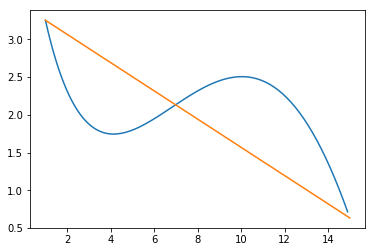

In [105]:
plt.plot(x, y)
plt.plot(np.array([1, 15]), np.array([f1(1)[0], f1(15)[0]]))
plt.show()

In [107]:
#2
a = np.array([[1, 1, 1], [1, 8, 8**2], [1, 15, 15**2]])
b = np.array([f(1), f(8), f(15)])
w = solve(a, b)
    
def f2(x):
    return w.reshape(1, 3).dot(np.array([1, x, x**2]))

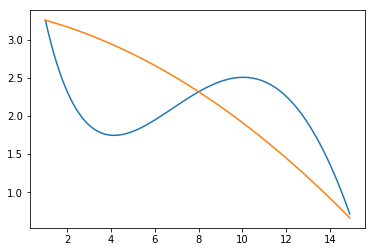

In [109]:
plt.plot(x, y)
x2 = []
y2 = []
for i in np.arange(1, 15, 0.1):
    x2.append(i)
    y2.append(f2(i))
    
x2 = np.array(x2)
y2 = np.array(y2)

plt.plot(x2, y2)
plt.show()

In [110]:
#3
a = np.array([[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]])
b = np.array([f(1), f(4), f(10), f(15)])
w = solve(a, b)
    
def f3(x):
    return w.reshape(1, 4).dot(np.array([1, x, x**2, x**3]))

In [111]:
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

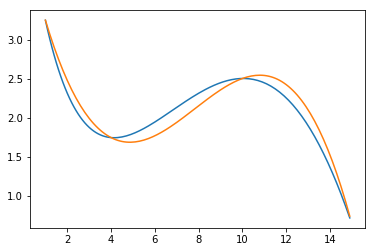

In [112]:
plt.plot(x, y)
x3 = []
y3 = []
for i in np.arange(1, 15, 0.1):
    x3.append(i)
    y3.append(f3(i))
    
x3 = np.array(x3)
y3 = np.array(y3)

plt.plot(x3, y3)
plt.show()

In [117]:
' '.join(list(map(str, w)))

'4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332'

In [118]:
#4
with open('submission-2.txt', 'w') as file:
    file.write(' '.join(list(map(str, w))))

In [119]:
!cat submission-2.txt

4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332